# T I T A N I C
Machine Learning From Disaster

#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

import seaborn as sns
from matplotlib import figure
import warnings

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, recall_score, precision_score, f1_score

%matplotlib inline
warnings.filterwarnings('ignore')

#### To left align the Table

In [2]:
%%html
<style>
table {float:left}
</style>

### Data Dictionary

|Column|Description|
|:---|:---| 
|<p>PassengerId| Unique ID of the passenge
|Survived| (1) or died (0)
|Pclass| Passenger's class (1st, 2nd, or 3rd)
|Name| Passenger's name
|Sex| Passenger's sex
|Age| Passenger's age
|SibSp| Number of siblings/spouses aboard the Titanic
|Parch| Number of parents/children aboard the Titanic
|Ticket| Ticket number
|Fare| Fare paid for ticket
|Cabin| Cabin number
|Embarked| Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)
    

#### Reading the data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking for null values in each column of the training dataframe

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print('Count of nulls before:', train.Age.isna().sum())
train.Age.fillna(train.Age.median(), inplace=True)
print('Count of nulls now:', train.Age.isna().sum())


Count of nulls before: 177
Count of nulls now: 0


# EDA

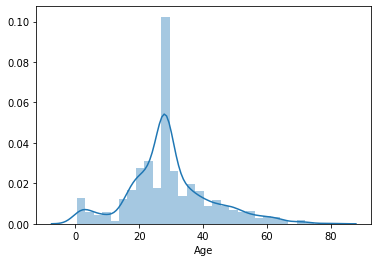

In [10]:
sns.distplot(train.Age)

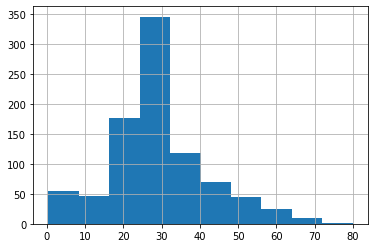

In [11]:
train.Age.hist()

In [12]:
survived_group = train.groupby("Survived")
survived_group.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.291433,0.473684,0.464912,48.395408


In [13]:
# Removing Cabin Column as it contains mostly NULL values
# dropping Name column as it's not required for the model building

to_drop =['Cabin','Name', 'Ticket','PassengerId']
train.drop(to_drop, axis=1, inplace=True)

In [14]:
train[pd.isnull(train).any(axis=1)].head() 
# a lot of nulls in Cabin 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [15]:
train[pd.isnull(train).any(axis=1)].head() 
# No null values (NaN)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
train = train.dropna() # Removing rows with NaN values 
train = train.reset_index() # reset row's index in case any rows are dropped 
                            # because index does not get dropped after dropping the row
#train.drop(['index'], axis=1, inplace=True)
train.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [20]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
list(train.columns)

['index',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [22]:
le = LabelEncoder()

cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] 

train.Pclass = train.Pclass.astype(str)
train.Sex = train.Sex.astype(str)
train.SibSp = train.SibSp.astype(str)
train.Parch = train.Parch.astype(str)
train.Embarked = train.Embarked.astype(str)

train.Pclass = le.fit_transform(train.Pclass)
train.Sex = le.fit_transform(train.Sex)
train.SibSp = le.fit_transform(train.SibSp)
train.Parch = le.fit_transform(train.Parch)
train.Embarked = le.fit_transform(train.Embarked)

In [23]:
train.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,2,1,22.0,1,0,7.2500,2
1,1,1,0,0,38.0,1,0,71.2833,0
2,2,1,2,0,26.0,0,0,7.9250,2
3,3,1,0,0,35.0,1,0,53.1000,2
4,4,0,2,1,35.0,0,0,8.0500,2


In [24]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

train["FamilySize"] = train[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)
train.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,0,2,1,22.0,1,0,7.2500,2,1
1,1,1,0,0,38.0,1,0,71.2833,0,1
2,2,1,2,0,26.0,0,0,7.9250,2,0
3,3,1,0,0,35.0,1,0,53.1000,2,1
4,4,0,2,1,35.0,0,0,8.0500,2,0


In [25]:
# Reorganize headers
train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Embarked', 'Survived']]
train.head()

,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Survived
0,2,1,22.0,1,0,1,7.2500,2,0
1,0,0,38.0,1,0,1,71.2833,0,1
2,2,0,26.0,0,0,0,7.9250,2,1
3,0,0,35.0,1,0,1,53.1000,2,1
4,2,1,35.0,0,0,0,8.0500,2,0


In [26]:
list(train.columns)

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'FamilySize',
 'Fare',
 'Embarked',
 'Survived']

In [27]:
predictors = ['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'FamilySize',
 'Fare',
 'Embarked']

In [28]:
X = train[predictors]
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

### Model Building

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 776 to 520
Data columns (total 8 columns):
Pclass        711 non-null int32
Sex           711 non-null int32
Age           711 non-null float64
SibSp         711 non-null int32
Parch         711 non-null int32
FamilySize    711 non-null int64
Fare          711 non-null float64
Embarked      711 non-null int32
dtypes: float64(2), int32(5), int64(1)
memory usage: 36.1 KB


In [30]:
clf_log = LogisticRegression()
log_model = clf_log.fit(X_train, y_train)

In [31]:
pred_log = log_model.predict(X_test)

### Confusion matrix and other model evaluation metrics

In [32]:
def generate_cf_mat_and_heatmap(model,x,y):
    
    model_string = str(model)
    print(' '.join(model_string.split('(')[:1])) # Extracting the model name from the model summary
    print('-----------------------------------------')
    
    pred = model.predict(x)
    
    cm = confusion_matrix(y, pred)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, cmap='YlGnBu') # cmap -- Y low, G neutral, B upper , maybe
    
    acc = accuracy_score(y, pred)
    p_score = precision_score(y, pred)
    r_score = recall_score(y, pred)
    f_score = f1_score(y, pred, average='weighted')
    
    fpr, tpr, thresholds = roc_curve(y, pred)
    area_under_curve = auc(fpr, tpr)
    
    max_len = 14
    print('Accuracy'.ljust(10),':', acc)
    print('Precision'.ljust(10),':', p_score)
    print('Recall'.ljust(10),':', r_score)
    print('F1_Score'.ljust(10),':',f_score)
    print('AUC'.ljust(10),':', area_under_curve)
    print('-----------------------------------------')

LogisticRegression
-----------------------------------------
Accuracy   : 0.8033707865168539
Precision  : 0.7377049180327869
Recall     : 0.703125
F1_Score   : 0.8022880490296221
AUC        : 0.7813870614035088
-----------------------------------------


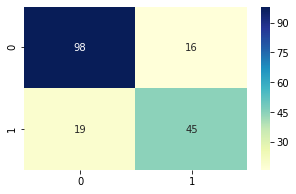

In [33]:
generate_cf_mat_and_heatmap(log_model, X_test, y_test)

### Random Forest Classifier

In [34]:
seed = 42
clf_rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth = 5,
                           min_samples_leaf=1, bootstrap=False,
                           random_state=seed, verbose=0)

rf_model = clf_rf.fit(X_train, y_train)

result_train = rf_model.score(X_train, y_train)
result_val = cross_val_score(rf_model,X_train, y_train, cv=5).mean()

print('Training Score = %s \nValidation score = %s' %(result_train , result_val))

Training Score = 0.8537271448663853 
Validation score = 0.8059489805968679


RandomForestClassifier
-----------------------------------------
Accuracy   : 0.8539325842696629
Precision  : 0.88
Recall     : 0.6875
F1_Score   : 0.8491886229642264
AUC        : 0.8174342105263158
-----------------------------------------


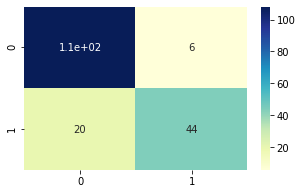

In [35]:
generate_cf_mat_and_heatmap(rf_model, X_test, y_test)

### XGBoost Classifier

In [36]:
clf_xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=100,
 max_depth=3,
 min_child_weight=3,
 gamma=0.1,
 subsample=0.7,
 colsample_bytree=0.8,
 seed=42)

xgb_model = clf_xgb.fit(X_train, y_train)

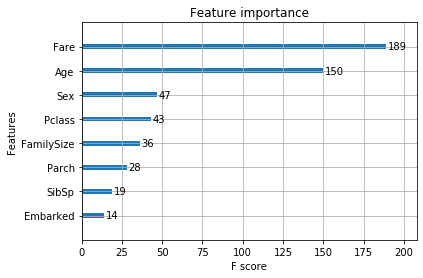

In [37]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

XGBClassifier
-----------------------------------------
Accuracy   : 0.8707865168539326
Precision  : 0.8360655737704918
Recall     : 0.796875
F1_Score   : 0.8700750036480374
AUC        : 0.854577850877193
-----------------------------------------


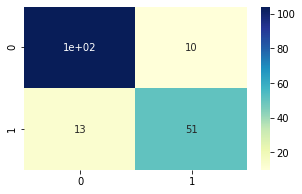

In [38]:
generate_cf_mat_and_heatmap(xgb_model, X_test, y_test)

### We can see that XGBoost Classifier works the best on this data and provides the best AUC Score, Precision, Recall and Accuracy.

### So we will use XGBoost Model for predictions.

In [39]:
le = LabelEncoder()

cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] 

test.Pclass = test.Pclass.astype(str)
test.Sex = test.Sex.astype(str)
test.SibSp = test.SibSp.astype(str)
test.Parch = test.Parch.astype(str)
test.Embarked = test.Embarked.astype(str)

test.Pclass = le.fit_transform(test.Pclass)
test.Sex = le.fit_transform(test.Sex)
test.SibSp = le.fit_transform(test.SibSp)
test.Parch = le.fit_transform(test.Parch)
test.Embarked = le.fit_transform(test.Embarked)

In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,1,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,2,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [41]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

test["FamilySize"] = test[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)

test.Age.fillna(test.Age.median(), inplace=True)
test.Fare.fillna(test.Fare.median(), inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int32
Name           418 non-null object
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int32
Parch          418 non-null int32
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int32
FamilySize     418 non-null int64
dtypes: float64(2), int32(5), int64(2), object(3)
memory usage: 31.1+ KB


In [42]:
# Reorganize headers
pred_on_data = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Embarked']]
pred_on_data.isna().sum()


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
FamilySize    0
Fare          0
Embarked      0
dtype: int64

In [43]:
pred = pd.DataFrame(xgb_model.predict(pred_on_data),  columns=['Survived'])

In [44]:
submission = pd.DataFrame({ "PassengerId": test.PassengerId,
                            "Survived":    pred.Survived }) 

In [45]:
submission.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [46]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [47]:
submission.to_csv('titanic_submission.csv', index=False)